**Mengimplementasikan Metode Modern Convolution Neural Networks
untuk Mendapatkan Informasi Fitur Gerakan Api (Studi Kasus: Data
Anotasi Segmentasi Kebakaran)**

---

kel 10

Alfian Dwi Kurnia 120450009

Marhanny Zahra N 120450017

Dhea Sukma Agustiana 120450035

Lis Nurani 120450055

In [ ]:
!wget https://www.dropbox.com/scl/fi/4c50z8gz91ahbzbd1kz0p/Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp&dl=0

--2023-10-25 08:53:11--  https://www.dropbox.com/scl/fi/4c50z8gz91ahbzbd1kz0p/Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc485cd460193907420d3d352270.dl.dropboxusercontent.com/cd/0/inline/CGR8HbtryXtBQISx6Fcg_JjMw-9cYUWj9-6QOekuZ9IHUdnuY_ydoI1SmLbUQQhoEqM0wFFO5WIAZQkSjX6CCu9l_wVcuUHLS4ElWGPZFNDcrrbbdLFX6eHO_YHIo4JPi2W3tdMDLgsTQlWN9_YxVox3/file# [following]
--2023-10-25 08:53:12--  https://uc485cd460193907420d3d352270.dl.dropboxusercontent.com/cd/0/inline/CGR8HbtryXtBQISx6Fcg_JjMw-9cYUWj9-6QOekuZ9IHUdnuY_ydoI1SmLbUQQhoEqM0wFFO5WIAZQkSjX6CCu9l_wVcuUHLS4ElWGPZFNDcrrbbdLFX6eHO_YHIo4JPi2W3tdMDLgsTQlWN9_YxVox3/file
Resolving uc485cd460193907420d3d352270.dl.dropboxusercontent.com (uc485cd460193907420d3d352270.dl.dropboxusercontent.com)..

In [ ]:
!unzip Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp -d train

Archive:  Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp
   creating: train/‏test/
   creating: train/‏test/Video01_GT/
 extracting: train/‏test/Video01_GT/Video01_GT_005_jpg.rf.edc9a0cc8cdb59c81f55dd4bd307d48e.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_015_jpg.rf.73c83807d984346d281b4490afcff5f4.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_026_jpg.rf.d7e0d89eca7482f31c3efb9d7feb2377.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_027_jpg.rf.7a92b7c367c05f58205c0fe479e81fda.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_030_jpg.rf.6f683bf3e3ed9469e8eb06c90021999a.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_034_jpg.rf.eeefbf82c6f7156b1a716bde7f985fe9.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_037_jpg.rf.c7a44f58743ea9d465d0b37b45dbac8e.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_040_jpg.rf.a2eaf6c9a39aad68b5af7021f020bb17.jpg  
 extracting: train/‏test/Video01_GT/Video01_GT_041_jpg.rf.8d42337e780c84df9149ecba6d12

In [ ]:
!unzip Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp -d test

Archive:  Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp
   creating: test/‏test/
   creating: test/‏test/Video01_GT/
 extracting: test/‏test/Video01_GT/Video01_GT_005_jpg.rf.edc9a0cc8cdb59c81f55dd4bd307d48e.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_015_jpg.rf.73c83807d984346d281b4490afcff5f4.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_026_jpg.rf.d7e0d89eca7482f31c3efb9d7feb2377.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_027_jpg.rf.7a92b7c367c05f58205c0fe479e81fda.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_030_jpg.rf.6f683bf3e3ed9469e8eb06c90021999a.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_034_jpg.rf.eeefbf82c6f7156b1a716bde7f985fe9.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_037_jpg.rf.c7a44f58743ea9d465d0b37b45dbac8e.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_040_jpg.rf.a2eaf6c9a39aad68b5af7021f020bb17.jpg  
 extracting: test/‏test/Video01_GT/Video01_GT_041_jpg.rf.8d42337e780c84df9149ecba6d127978.jpg  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image
import os,shutil

In [ ]:
folders=os.listdir("train")
print((folders))

['train', 'valid', '\u200ftest']


In [ ]:
# this is to make Val folder in directory
if not os.path.isdir("Val"):
  os.mkdir("Val")
!ls

'Anotasi_Segmentasi_Kebakaran.zip?rlkey=o09gu13b8spf496dk3u5d27dp'   test    Val
 sample_data							     train


In [ ]:
# this to make sub folder in Val folder
for c in folders:
  p=os.path.join("Val",c)
  if not os.path.isdir(p):
    os.mkdir(p)

In [ ]:
print("for training data:- ")
for f in folders:
  path="train/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
train 12
valid 12
‏test 12


In [ ]:
# this is to move 10% image from train to val folder
# this is to run once if storage contain images in val then do not run this again as it will decrease the data from train data
Split=0.9

for f in os.listdir("train"):
  path = "train/"+f
  # this can also be used  path=os.path.join("Train",f)
  imgs=os.listdir(path)
  split_size= int(Split*len(imgs))
  file_to_move=imgs[split_size:]
  #print(len(file_to_move))
  #print(file_to_move)

  for img_f in file_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join("Val/"+f,img_f)
    #print(src)
    #print(dest)
    shutil.move(src,dest)

In [ ]:
print("for training data:- ")
for f in folders:
  path="train/"+f
  print(f+ " "+ str(len(os.listdir(path))))
print("")
print("for vaidation data:- ")
for f in folders:
  path="Val/"+f
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
train 9
valid 9
‏test 9

for vaidation data:- 
train 3
valid 3
‏test 3


(640, 640, 3)


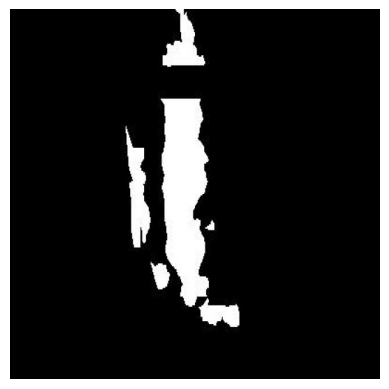

In [ ]:
sample_path="train/train/Video02_GT/Video02_GT_102_jpg.rf.34fe9b338ff193b1a0c8fb57fdaf214a.jpg"
img=image.load_img(sample_path)
x=image.img_to_array(img)/255.0
print(x.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

(640, 640, 3)


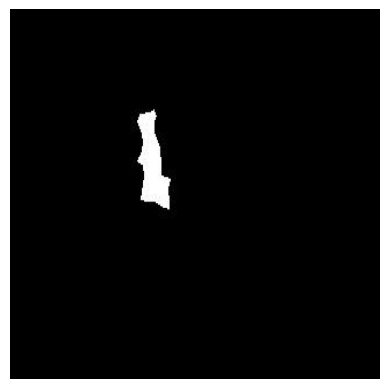

In [ ]:
sample_path="train/train/Video11_GT/Video11_GT_127_jpg.rf.7f4e1bcea81d977c19d5f58e523e384a.jpg"
img=image.load_img(sample_path)
x=image.img_to_array(img)/255.0
print(x.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1.0/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             )
val_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
    "train/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    "Val/",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 2150 images belonging to 3 classes.
Found 695 images belonging to 3 classes.


In [ ]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(32, 224, 224, 3)
(32, 3)


In [ ]:
train_generator.class_indices

{'train': 0, 'valid': 1, '\u200ftest': 2}



# **Alexnet CNN Model**


In [ ]:
import tensorflow as tf
import keras
from keras import layers

In [ ]:
#Instantiate an empty model
model = keras.Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(200, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))

# 2nd Fully Connected Layer
model.add(Dense(100))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.2))

# 3rd Fully Connected Layer
model.add(Dense(50))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        11648     
                                                                 
 activation (Activation)     (None, 54, 54, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        247872    
                                                                 
 activation_1 (Activation)   (None, 17, 17, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=47,
    epochs=10,
    validation_data=val_generator,
    validation_steps=8
)

<ipython-input-31-fc1e3a057e2e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
plt.style.use("seaborn")

plt.plot(hist.history['accuracy'],label="training acc",c='red')
plt.plot(hist.history['val_accuracy'],label="validation acc",c='blue')
plt.legend()
plt.show()

<ipython-input-25-51527acd06f2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


NameError: ignored

# **Loading test data**

In [ ]:
path="test/"
y_df=pd.read_csv(path+"sample_submission.csv")
y_df.shape

FileNotFoundError: ignored

In [ ]:
y_df.head(7)

NameError: ignored

In [ ]:
y_df.drop(['Class'],inplace=True,axis=1)

In [ ]:
y_df=y_df.values.reshape((-1,))
print(y_df.shape)

In [ ]:
from pathlib import Path
pi_test=Path("test/images/")

image_data_test=[]
label_test=[]

for image_path in pi_test.glob("*"):
  #label=(str(image_path).split("\\")[-1]) this is not woring in goole colab
  label=(str(image_path).split("/")[-1])

  img=image.load_img(image_path,target_size=(224,224,3))
  image_array=image.img_to_array(img)/255.0
  image_data_test.append(image_array)
  label_test.append(label)


In [ ]:
image_data_test=np.array(image_data_test)

In [ ]:
print(label_test[:5])
print("\n\n")
print(label_test[0])

In [ ]:
print(image_data_test.shape)
print(len(label_test))

# Getting prediction from model

In [ ]:
y_predicted=model.predict_classes(image_data_test)

In [ ]:
y_predicted

In [ ]:
y_pred=[]
for i in range(image_data_test.shape[0]):
  index=label_test.index(y_df[i])
  y=y_predicted[index]
  y_pred.append((y_df[i],y))

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
y_pred

In [ ]:
df_pre=pd.DataFrame(data=y_pred,columns=['Name','Class'])

In [ ]:
df_pre.head(7)

In [ ]:
df_pre.to_csv('y_predict_of_pokedex_learning_own_features1.csv',index=False)